Need to read dcm files: 
* https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/
* https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-e1d0358d9dba
* https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/

**.nii.tz format**
* https://nilearn.github.io/introduction.html#what-is-nilearn-mvpa-decoding-predictive-models-functional-connectivity
* http://nipy.org/nibabel/nibabel_images.html

### fMRI preprocessing
* https://www.coursera.org/learn/functional-mri/home/week/3


* SURFACE EXTRACTION: https://pyscience.wordpress.com/2014/09/11/surface-extraction-creating-a-mesh-from-pixel-data-using-python-and-vtk/
http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20140908_SurfaceExtraction/Material/SurfaceExtractionVTK.ipynb

* IMAGE SEGMENTATION: https://pyscience.wordpress.com/2014/10/19/image-segmentation-with-python-and-simpleitk/
http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20141001_SegmentationSimpleITK/Material/SegmentationSimpleITK.ipynb

* VOLUME RENDERING: https://pyscience.wordpress.com/2014/11/16/volume-rendering-with-python-and-vtk/
http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20141029_VolumeRendering/Material/VolumeRendering.ipynb

(https://pyscience.wordpress.com/archives/)

* http://mriquestions.com/data-pre-processing.html

Similar Kaggle competitions:
* https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/kernels
* https://www.kaggle.com/c/data-science-bowl-2017/discussion/28034
* https://www.kaggle.com/ashishpatel26/chexnet-radiologist-level-pneumonia-detection
* https://github.com/booz-allen-hamilton/DSB3Tutorial

**THE BEST**: https://github.com/taigw/brats17

to download the pre-trained model: https://cmiclab.cs.ucl.ac.uk/CMIC/NiftyNetExampleServer/blob/master/anisotropic_nets_brats_challenge_model_zoo.md

In [1]:
import numpy as np
import pandas as pd
import ntpath
import os
import matplotlib.pyplot as plt
% matplotlib inline
import pydicom

In [2]:
def reading_csv_files(folder_path):
    # saving all the csv files in a dataframe
    import os
    import glob
    # glob.glob('*.csv') #find all the csv files in a pathname. 
    os.chdir(folder_path)
    csv_files = [i for i in glob.glob('*.csv')]

    # Reading each csv file and storing them in a dictionnary containing the file name and the dataframe
    dict_files={}
    files_names=[]
    for files in csv_files:
    #for i, files in enumerate(csv_files): 
        df=pd.read_csv(files,engine='python')
        basepath, filename=ntpath.split(files)
        files_names.append(filename)
        dict_files[filename]=df

    # Calculating the # of rows and features for each dataframe and storing them in a list of tuples
    shape_df=[]
    for i in range(0,len(dict_files.keys())):
        nrows, ncols=(len(dict_files[files_names[i]]),len(dict_files[files_names[i]].columns))
        shape_df.append((nrows,ncols))
        
    return (shape_df,files_names,dict_files)

In [6]:
folder_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/data/PPMI-final-dataset-382018/4-Imaging/'
files_names=reading_csv_files(folder_path)[1]
dict_files=reading_csv_files(folder_path)[2]
MRI=dict_files[files_names[6]]
print(len(MRI))
print(len(np.unique(MRI['PATNO'])))
SEL=['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT',
       'MRICMPLT', 'MRIWDTI', 'MRIWRSS', 'MRIRSLT',
       'PDMEDYN', 'ONLDOPA', 'ONDOPAG']
MRI=MRI[SEL]
MRI_final=MRI.fillna(0)
path_saveddf='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/MRI_processed.csv'
MRI_final.to_csv(path_saveddf)
MRI_final.head(2)

2125
1326


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MRICMPLT,MRIWDTI,MRIWRSS,MRIRSLT,PDMEDYN,ONLDOPA,ONDOPAG
0,234501601,3400,BL,MRI,07/2010,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,235626601,3403,BL,MRI,07/2010,1.0,0.0,0.0,2.0,0.0,0.0,0.0


In [14]:
MRIINFO=dict_files[files_names[10]]
print(len(MRIINFO))
print(len(set(MRIINFO['study_subject_id'])))
pathMRIINFO='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/MRIINFO_processed.csv'
MRIINFO.to_csv(pathMRIINFO)
MRIINFO.head(2)

1342
811


,study_subject_id,11_scan_acquisition_date_mr_E1_C3,12_scan_quality_rating_mr_E1_C3,13_dti_sequences_E1_C3,11a_rs_mri_E1_C4,comment_E1_C7,other_E1_C7
0,3400,07/2010,2.0,No,NaN,NaN,NaN
1,3401,07/2010,2.0,No,NaN,NaN,NaN


In [11]:
#!cd '/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI
#!ls > listOfFolders.txt

`path_listOffolders='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/listOfFolders.txt'


appendText="'"
folders=open(path_listOffolders,'r')
updatedFolders=open('/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/updatedfolders.txt','a')
for name in folders:
    updatedFolders.write(appendText + name.rstrip() + appendText + '\n')
updatedFolders.close()

path_updatedFolders='/Users/alicemartin/02_DSR_Project/01_Data/00-PPMI-final-dataset-382018/fMRI_data/PPMI/updatedfolders.txt'
with open(path_updatedFolders, 'r') as f:
    file_lines = [''.join([x.strip(), ',', '\n']) for x in f.readlines()]

with open(path_updatedFolders, 'w') as f:
    f.writelines(file_lines)`

missing_index=df_metadata_csv[df_metadata_csv['Subject'].isin(foldersPPMI)==False].index
missing_subject=df_metadata_csv.loc[df_metadata_csv['Subject'].isin(foldersPPMI)==False,'Subject']
list_missing_subject=list(missing_subject.values)

### Test on Patient # 3108 folder

In [33]:


path_test='/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/PPMI/3108/ep2d_RESTING_STATE/2015-05-06_09_33_18.0/S264302'



210
(462, 476, 210) (3.2941176891327, 3.2941176891327, 3.2999999523163)
(462, 476)
((462, 476), (462, 476))


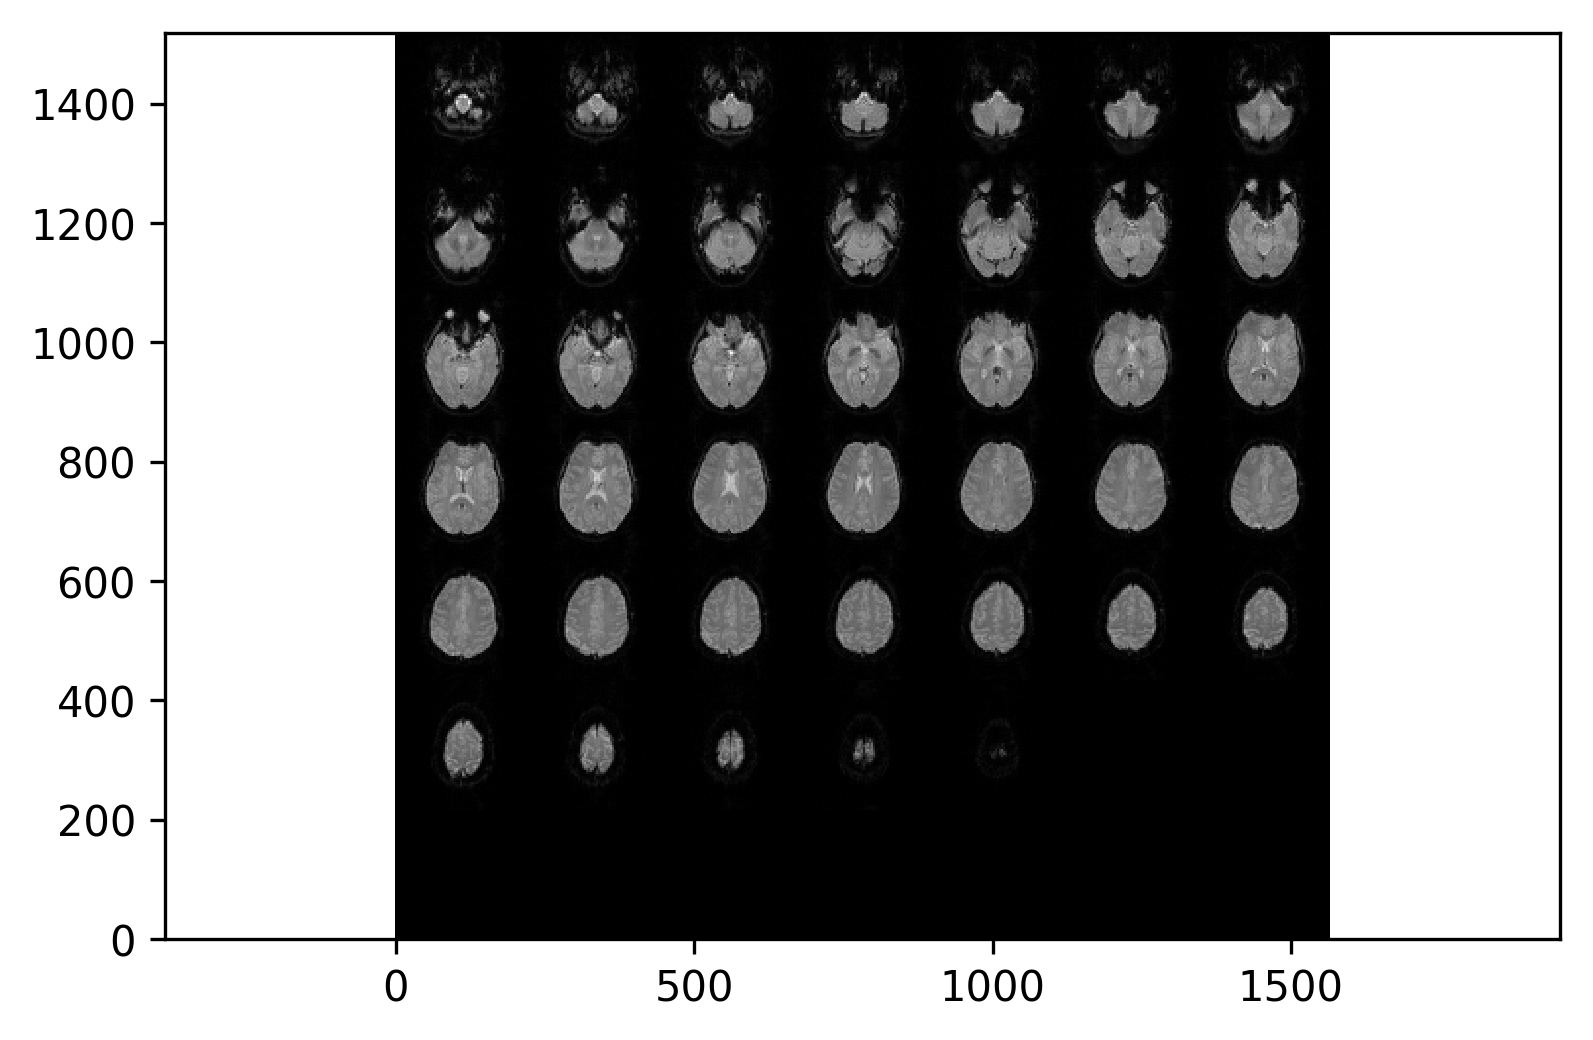

In [34]:
PathDicom =path_test
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
print(len(lstFilesDCM))

# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

print(ConstPixelDims, ConstPixelSpacing)

x = np.arange(0.0, (ConstPixelDims[0])*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1])*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2])*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 80])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

In [ ]:
#RefDs

## 1. Data-Preprocessing

### Creating the labels

In [17]:
file_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/dfFinal.csv'
df=pd.read_csv(file_path)
df.drop(columns='Unnamed: 0',inplace=True)
df.NHY=df['NHY'].apply(lambda x: round(x,0))
#df.head()
dfSel=df[['PATNO','EVENT_ID','INFODT_date','VISIT_ID','num_visits','NHY']]
dfSel.head()

path_metadata_csv='/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/pop_all_-_FMRI_9_03_2018.csv'

df_metadata=pd.read_csv(path_metadata_csv)
print(len(df_metadata))
pat_fMRI=list(np.unique(df_metadata['Subject']))
#df_metadata.rename(columns={'Subject':'PATNO'},inplace=True)
df_metadata['PATNO']=df_metadata.Subject
df_metadata.sort_values('PATNO',inplace=True)
df_metadata.drop(columns=['Format','Downloaded','Modality','Type'],inplace=True)
print(set(df_metadata.Visit))
PPMIpatients=list(set(df_metadata[df_metadata.Group!='Phantom']))

PhantomList=df_metadata.loc[df_metadata['Group']=='Phantom','PATNO']
print(len(PhantomList))
PhantomList2=PhantomList.apply(lambda x: x[:3])
print(len(np.unique(PhantomList2.values)))
df_metadata.loc[df_metadata['Group']=='Phantom','PATNO']=PhantomList2

# convert Acq Date to datatime
from datetime import datetime
df_metadata['AcqDT_date']=df_metadata['Acq Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

df_metadata.head()

subdf_fMRI=dfSel[dfSel.PATNO.isin(PPMIpatients)]
subdf_fMRI.head()

df_metadata.groupby('Subject').size().sort_values(ascending=False)
df_metadata.groupby('Subject').size().sort_values(ascending=False).value_counts()

def map_feat_to_feat(df,feat1,feat2,dates_name):
    dict_patients_INFODT={}
    for patient in list(set(df[feat1])):
        dates=df.loc[df[feat1]==patient, feat2]
        INFODT_list=[date for date in dates.values]
        dict_patients_INFODT[patient]=INFODT_list
    #dict_patients_INFODT
    map_patient_INFODT=pd.Series(dict_patients_INFODT).to_frame()
    #map_patient_INFODT[feat1]=map_patient_INFODT.index
    map_patient_INFODT.rename(columns={0:dates_name},inplace=True)
    return map_patient_INFODT


map_patient_INFODT=map_feat_to_feat(dfSel,'PATNO','INFODT_date','visit_dates')
#map_patient_INFODT.head()

map_patient_acqDT=map_feat_to_feat(df_metadata[df_metadata['Group']!='Phantom'],'PATNO','AcqDT_date','acquisitions_dates')
print(len(map_patient_acqDT))
#map_patient_acqDT.head()

487
{0, 1, 5, 7, 9, 11, 21, 90}
258
9
152


### Processing of the brain scans

In [18]:
PathDicom ='/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/PPMI'
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
print('number of DCM files:{}'.format(len(lstFilesDCM)))
patients_fMRI=os.listdir(PathDicom)
print('number of brain scans:{}'.format(len(patients_fMRI)))

#lstFilesDCM
with open('List_DCM_files.txt', 'w') as f:
    for item in lstFilesDCM:
        f.write("%s\n" % item)

dict_pat_dcmfile={}
list_pat_dcmfile=[]
for dcm in lstFilesDCM:
    p=os.path.relpath(dcm,PathDicom)
    pat=str.split(p,'/')[0]
    scan_date=str.split(p,'/')[2]
    list_pat_dcmfile.append((pat,scan_date,dcm))
list_pat_dcmfile[0]

number of DCM files:89676
number of brain scans:414


('3365',
 '2013-10-09_08_33_27.0',
 '/Users/alicemartin/02_DSR_Project/00-PPMI-final-dataset-382018/fMRI_data/PPMI/3365/ep2d_RESTING_STATE/2013-10-09_08_33_27.0/S205645/PPMI_3365_MR_ep2d_RESTING_STATE_br_raw_20131107160424133_73_S205645_I397597.dcm')

In [19]:
Patient_DCM_Mapping=pd.Series(list_pat_dcmfile).to_frame()
Patient_DCM_Mapping.rename(columns={0:'tuple'},inplace=True)
Patient_DCM_Mapping['Subject']=Patient_DCM_Mapping['tuple'].apply(lambda x: x[0])
Patient_DCM_Mapping['scan_date']=Patient_DCM_Mapping['tuple'].apply(lambda x: x[1])
Patient_DCM_Mapping['dcm_file']=Patient_DCM_Mapping['tuple'].apply(lambda x: x[2])
assert len(Patient_DCM_Mapping)==len(lstFilesDCM)
print('number of patients:{}'.format(len(set(Patient_DCM_Mapping['Subject']))))
Patient_DCM_Mapping['scan_date']=Patient_DCM_Mapping['scan_date'].apply(lambda x: str.split(x,'_')[0])
Patient_DCM_Mapping['AcqDT_date']=Patient_DCM_Mapping['scan_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
Patient_DCM_Mapping.head(2)

number of patients:410


,tuple,Subject,scan_date,dcm_file,AcqDT_date
0,"(3365, 2013-10-09_08_33_27.0, /Users/alicemart...",3365,2013-10-09,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,2013-10-09
1,"(3365, 2013-10-09_08_33_27.0, /Users/alicemart...",3365,2013-10-09,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,2013-10-09


In [20]:
df_metadata.head(2)

,Image Data ID,Subject,Group,Sex,Age,Visit,Description,Acq Date,PATNO,AcqDT_date
486,423662,00705MAR14,Phantom,M,59,0,ep2d_RESTING_STATE,3/05/2014,007,2014-03-05
485,373407,00706FEB13,Phantom,X,50,0,ep2d_RESTING_STATE,2/06/2013,007,2013-02-06


In [21]:
pat_meta=list(np.unique(df_metadata['Subject']))
pat_files=list(set(Patient_DCM_Mapping['Subject']))
print(np.sum([x in pat_files for x in pat_meta]))
print(np.sum([x in pat_fMRI for x in pat_meta]))
missing_pat=[x in pat_meta for x in pat_files]

410
410


In [22]:
slices=Patient_DCM_Mapping.groupby(['Subject','scan_date']).size().to_frame().rename(columns={0:'slices'})
slices.reset_index(inplace=True)
Subject_slices210=slices.loc[slices['slices']==210,'Subject']
slices.head()
Patient_DCM_Mapping['slices']=210
Patient_DCM_Mapping['slices']=Patient_DCM_Mapping['slices'].where(Patient_DCM_Mapping['Subject'].isin(Subject_slices210),
                                                                 'to_drop')
Patient_DCM_Mapping.head()

,tuple,Subject,scan_date,dcm_file,AcqDT_date,slices
0,"(3365, 2013-10-09_08_33_27.0, /Users/alicemart...",3365,2013-10-09,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,2013-10-09,210
1,"(3365, 2013-10-09_08_33_27.0, /Users/alicemart...",3365,2013-10-09,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,2013-10-09,210
2,"(3365, 2013-10-09_08_33_27.0, /Users/alicemart...",3365,2013-10-09,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,2013-10-09,210
3,"(3365, 2013-10-09_08_33_27.0, /Users/alicemart...",3365,2013-10-09,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,2013-10-09,210
4,"(3365, 2013-10-09_08_33_27.0, /Users/alicemart...",3365,2013-10-09,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,2013-10-09,210


In [23]:
df_fMRI=pd.merge(df_metadata,Patient_DCM_Mapping,on='Subject',how='outer')
mask=df_fMRI['tuple'].isnull()
missing=df_fMRI.loc[mask,'Subject']
df_fMRI=df_fMRI.dropna()
df_fMRI.drop(columns=['tuple','scan_date','AcqDT_date_y'],inplace=True)
df_fMRI=df_fMRI[df_fMRI['slices']==210]
df_fMRI['pat_date_ID']=df_fMRI['PATNO']+'-'+df_fMRI['Acq Date']
df_fMRI['label']=df_fMRI.Group
df_fMRI
df_fMRI.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Description,Acq Date,PATNO,AcqDT_date_x,dcm_file,slices,pat_date_ID,label
0,423662,00705MAR14,Phantom,M,59,0,ep2d_RESTING_STATE,3/05/2014,007,2014-03-05,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,210,007-3/05/2014,Phantom
1,423662,00705MAR14,Phantom,M,59,0,ep2d_RESTING_STATE,3/05/2014,007,2014-03-05,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,210,007-3/05/2014,Phantom
2,423662,00705MAR14,Phantom,M,59,0,ep2d_RESTING_STATE,3/05/2014,007,2014-03-05,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,210,007-3/05/2014,Phantom
3,423662,00705MAR14,Phantom,M,59,0,ep2d_RESTING_STATE,3/05/2014,007,2014-03-05,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,210,007-3/05/2014,Phantom
4,423662,00705MAR14,Phantom,M,59,0,ep2d_RESTING_STATE,3/05/2014,007,2014-03-05,/Users/alicemartin/02_DSR_Project/00-PPMI-fina...,210,007-3/05/2014,Phantom


In [31]:
patients_fMRI=list(set(df_fMRI['PATNO']))
#lstFilesDCM
with open('List_patients_fMRI.txt', 'w') as f:
    for item in patients_fMRI:
        f.write("%s\n" % item)
np.array(patients_fMRI)

array(['3771', '3550', '3385', '291', '3831', '3808', '3367', '3384',
       '3101', '3569', '4029', '3818', '4030', '3124', '4032', '3116',
       '3105', '3310', '60040', '3107', '007', '3838', '3131', '3592',
       '3835', '3374', '289', '3823', '40366', '3360', '3573', '3829',
       '60041', '3832', '290', '50222', '60024', '3327', '3130', '088',
       '3802', '3582', '60070', '40451', '3556', '40360', '3574', '3870',
       '3589', '3830', '3128', '4013', '3815', '14426', '3134', '60073',
       '3318', '4035', '3132', '3565', '3769', '4005', '3118', '3356',
       '60036', '3359', '3559', '3386', '4011', '023', '3106', '3585',
       '50110', '4019', '3351', '3575', '3375', '3557', '3371', '3587',
       '3123', '3834', '3350', '3593', '3354', '3820', '60033', '40338',
       '51392', '3828', '3113', '3126', '3787', '3567', '3586', '3357',
       '3836', '3369', '50172', '3352', '3389', '51302', '3826', '032',
       '3365', '3390', '3581', '16644', '3871', '3392', '3552', '60

In [7]:
def map_feat_to_feat(df,feat1,feat2,dates_name):
    dict_patients_INFODT={}
    for patient in list(set(df[feat1])):
        dates=df.loc[df[feat1]==patient, feat2]
        INFODT_list=[date for date in dates.values]
        dict_patients_INFODT[patient]=INFODT_list
    #dict_patients_INFODT
    map_patient_INFODT=pd.Series(dict_patients_INFODT).to_frame()
    #map_patient_INFODT[feat1]=map_patient_INFODT.index
    map_patient_INFODT.rename(columns={0:dates_name},inplace=True)
    return map_patient_INFODT

map_pat_fMRI=map_feat_to_feat(df_fMRI,'pat_date_ID','dcm_file','dcm_list')
map_pat_fMRI.head()

NameError: name 'df_fMRI' is not defined

### Plotting slices for each patient

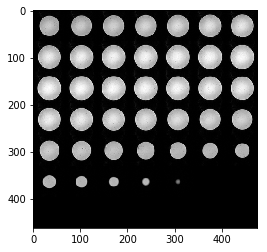

In [42]:
import matplotlib.pyplot as plt

for dcm_files in map_pat_fMRI.values[0]:
    slices = [pydicom.read_file(path) for path in dcm_files]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    #          the first slice
    plt.imshow(slices[0].pixel_array)
    plt.show()
    
for filenameDCM in lstFilesDCM:
# read the file
ds = pydicom.read_file(filenameDCM)
# store the raw image data
ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 80])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)

fig = plt.figure()
for num,each_slice in enumerate(new_slices):
    y = fig.add_subplot(4,5,num+1)
    y.imshow(each_slice, cmap='gray')
plt.show()

### Getting the 3D-info for each brain scan

In [18]:
map_pat_fMRI.dropna(inplace=True)
#pydicom.read_file(map_pat_fMRI['dcm_list'].iloc[0][0])
print(len(map_pat_fMRI))
#map_pat_fMRI.dcm_list[-1]

478


In [ ]:
PixelDims_fMRI={}
PixelSpacing_fMRI={}
xyz_fMRI={}
ArrayDicom_fMRI={}
#map_pat_fMRI['PixelDims_fMRI']=np.zeros(len(map_pat_fMRI))

#for index in list(map_pat_fMRI.index):
fMRI_scans=list(map_pat_fMRI.index)
for index in fMRI_scans[:len(map_pat_fMRI)-2]:
    RefDs = pydicom.read_file(map_pat_fMRI['dcm_list'].loc[index][0])

            # Load dimensions based on the number of rows, columns, and slices (along the Z axis)
    ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

            # Load spacing values (in mm)
    ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

    x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
    y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
    z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])
    
    ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
    fMRI_dcmfiles=map_pat_fMRI.loc[index, 'dcm_list']
    for index2, dcm_file in enumerate(fMRI_dcmfiles):
        ds = pydicom.read_file(dcm_file)
        ArrayDicom[:, :, index2] = ds.pixel_array

    #map_pat_fMRI.iloc[index]['PixelDims_fMRI']=ConstPixelDims
    #map_pat_fMRI.iloc[index]'PixelSpacing']=ConstPixelSpacing
    #map_pat_fMRI.iloc[index]'xyz']=(x,y,z)
    
    PixelDims_fMRI[index]=ConstPixelDims
    PixelSpacing_fMRI[index]=ConstPixelSpacing
    xyz_fMRI[index]=(x,y,z)
    ArrayDicom_fMRI[index]=ArrayDicom

In [117]:
ArrayDicom_dict={}
# The array is sized based on 'ConstPixelDims'
for index in fMRI_scans[:len(map_pat_fMRI)-2]:
    ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

    # loop through all the DICOM files
    for filenameDCM in lstFilesDCM:
        # read the file
        ds = dicom.read_file(filenameDCM)
        # store the raw image data
        ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

(462, 476, 210)

In [129]:
len(PixelDims_fMRI.keys())

476

### Full data preprocessing pipeline

In [ ]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

print(ConstPixelDims, ConstPixelSpacing)

x = np.arange(0.0, (ConstPixelDims[0])*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1])*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2])*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
X, Y = np.meshgrid(y, x)
array=np.flipud(ArrayDicom[:, :, 80])
print(array.shape),print((X.shape,Y.shape))
plt.pcolormesh(X,Y,array)